In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:
file_path = '/content/All the Intermediate Colleges in Pakistan.csv'
data = pd.read_csv(file_path)

In [4]:
print(data.shape)

(1630, 6)


In [5]:
print(data.head())

                                                Name  \
0                                   Campus.pk Lahore   
1        Allama Iqbal Open University Aiou Islamabad   
2           Government College University Gcu Lahore   
3             Govt College University GCU Faisalabad   
4  Lahore College For Women University (Lcwu) Lahore   

                                            Location  \
0  Office 206, 2nd Floor Siddique Trade Center Ma...   
1                        Sector H-8, Islamabad-44000   
2          GC University, Katchery Road Lahore 54000   
3                       Kotwali Rd, Faisalabad 38000   
4                Near Wapda Flats, Jail Road, Lahore   

                                       Study Program   Sector Affiliation  \
0                FSc Pre Engineering Fsc Pre Medical  Private         ads   
1  FSc Pre Engineering ICs Computer Science FSc P...   Public         NaN   
2  FSc Pre Engineering ICS Computer Science FSc P...   Public         HEC   
3  FSc Pre-Enginee

In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1630 entries, 0 to 1629
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           1630 non-null   object
 1   Location       1626 non-null   object
 2   Study Program  1630 non-null   object
 3   Sector         1101 non-null   object
 4   Affiliation    155 non-null    object
 5   Rating         1630 non-null   object
dtypes: object(6)
memory usage: 76.5+ KB
None


In [7]:
print(data.describe())

                    Name Location  \
count               1630     1626   
unique              1630     1573   
top     Campus.pk Lahore  Chakwal   
freq                   1       11   

                                            Study Program   Sector  \
count                                                1630     1101   
unique                                                774        2   
top     FA ICS Computer Science FSc Pre Medical FSc Pr...  Private   
freq                                                   49      562   

                   Affiliation Rating  
count                      155   1630  
unique                      97     21  
top     University of Sargodha     0*  
freq                         7   1119  


In [8]:
print(data.columns)

Index(['Name', 'Location', 'Study Program', 'Sector', 'Affiliation', 'Rating'], dtype='object')


In [9]:
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Name                0
Location            4
Study Program       0
Sector            529
Affiliation      1475
Rating              0
dtype: int64


In [10]:
data['Location'].fillna('Unknown', inplace=True)
data['Sector'].fillna('Unknown', inplace=True)
data['Affiliation'].fillna('Unknown', inplace=True)

In [11]:
data.drop_duplicates(inplace=True)

In [12]:
data['Rating'] = data['Rating'].str.strip()

In [13]:
data['Rating'] = pd.to_numeric(data['Rating'].str.replace('*', ''), errors='coerce')

In [14]:
print("Non-numeric values in 'Rating' column after cleaning:", data['Rating'].isna().sum())

Non-numeric values in 'Rating' column after cleaning: 0


In [15]:
data.dropna(subset=['Rating'], inplace=True)

In [16]:
data['Sector'] = data['Sector'].str.strip().str.capitalize()

In [17]:
data['Sector'] = data['Sector'].apply(lambda x: x.capitalize() if pd.notnull(x) else x)

In [18]:
print(data.isnull().sum())
print(data.duplicated().sum())

Name             0
Location         0
Study Program    0
Sector           0
Affiliation      0
Rating           0
dtype: int64
0


In [19]:
summary_statistics = data.describe(include='all')
print(summary_statistics)

                    Name Location  \
count               1630     1630   
unique              1630     1574   
top     Campus.pk Lahore  Chakwal   
freq                   1       11   
mean                 NaN      NaN   
std                  NaN      NaN   
min                  NaN      NaN   
25%                  NaN      NaN   
50%                  NaN      NaN   
75%                  NaN      NaN   
max                  NaN      NaN   

                                            Study Program   Sector  \
count                                                1630     1630   
unique                                                774        3   
top     FA ICS Computer Science FSc Pre Medical FSc Pr...  Private   
freq                                                   49      562   
mean                                                  NaN      NaN   
std                                                   NaN      NaN   
min                                                   NaN      Na

In [20]:
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<ipython-input-21-59f659942f30>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sector_distribution.index, y=sector_distribution.values, palette='viridis')


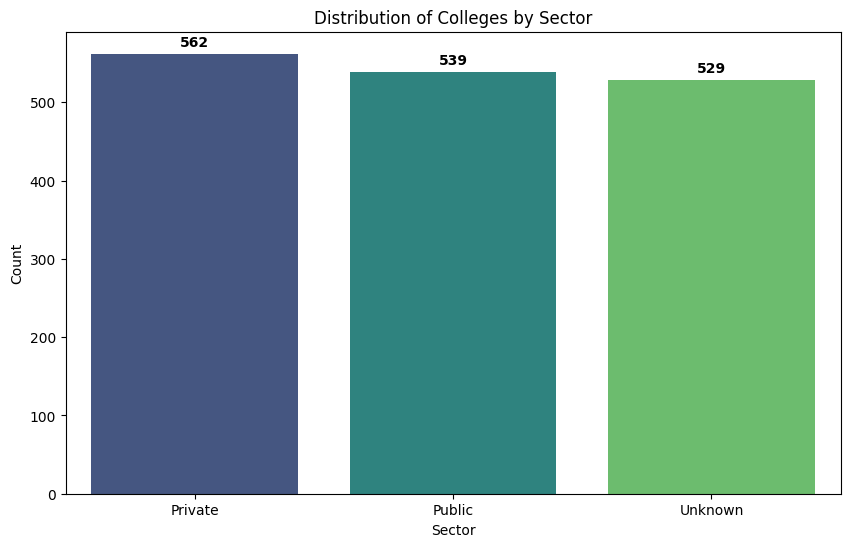

In [21]:
plt.figure(figsize=(10, 6))
sector_distribution = data['Sector'].value_counts()
sns.barplot(x=sector_distribution.index, y=sector_distribution.values, palette='viridis')
plt.title('Distribution of Colleges by Sector')
plt.xlabel('Sector')
plt.ylabel('Count')
for index, value in enumerate(sector_distribution.values):
    plt.text(index, value + 5, str(value), ha='center', va='bottom', fontweight='bold')
plt.show()

<ipython-input-22-5a9d65bf844b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=affiliation_distribution.values, y=affiliation_distribution.index, palette='viridis')


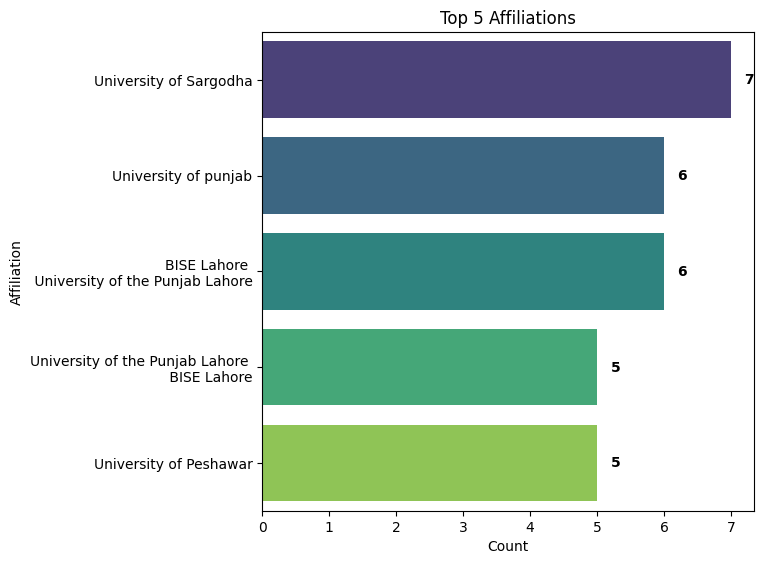

In [22]:
filtered_data = data[data['Affiliation'] != 'Unknown']
affiliation_distribution = filtered_data['Affiliation'].value_counts().head(5)
plt.figure(figsize=(8, 6))
sns.barplot(x=affiliation_distribution.values, y=affiliation_distribution.index, palette='viridis')
plt.title('Top 5 Affiliations')
plt.xlabel('Count')
plt.ylabel('Affiliation')
for index, value in enumerate(affiliation_distribution.values):
    plt.text(value + 0.2, index, str(value), va='center', fontweight='bold', ha='left')
plt.tight_layout(pad=2.0)
plt.show()

In [23]:
location_group = data.groupby('Location').agg({'Name': 'count','Sector': lambda x: x.value_counts().idxmax(),'Rating': lambda x: x.value_counts().idxmax()}).reset_index()

In [24]:
location_group.columns = ['Location', 'College Count', 'Most Common Sector', 'Most Common Rating']

In [25]:
location_group_sorted = location_group.sort_values(by='College Count', ascending=False)

In [26]:
top_regions = location_group_sorted.head(10)

<ipython-input-27-a351ee23cf9d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Location', y='College Count', data=top_regions, palette='viridis')


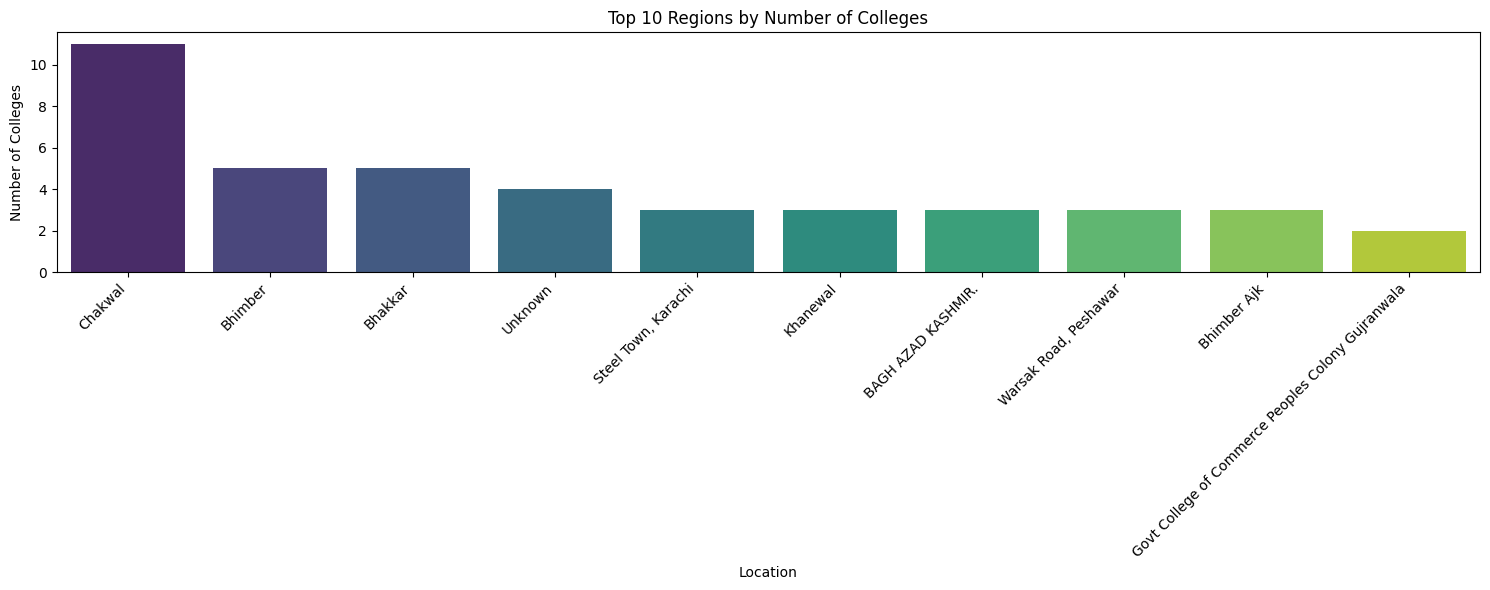

In [27]:
plt.figure(figsize=(15, 6))
sns.barplot(x='Location', y='College Count', data=top_regions, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Regions by Number of Colleges')
plt.xlabel('Location')
plt.ylabel('Number of Colleges')
plt.tight_layout()
plt.show()

In [28]:
print(top_regions)

                                               Location  College Count  \
445                                             Chakwal             11   
384                                             Bhimber              5   
379                                             Bhakkar              5   
1553                                            Unknown              4   
1509                                Steel Town, Karachi              3   
1075                                           Khanewal              3   
352                                  BAGH AZAD KASHMIR.              3   
1564                              Warsak Road, Peshawar              3   
385                                         Bhimber Ajk              3   
746   Govt College of Commerce Peoples Colony Gujran...              2   

     Most Common Sector  Most Common Rating  
445              Public                 0.0  
384             Private                 0.0  
379              Public                 0.0  
1

<ipython-input-29-df812dd55cc2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rating', y='Location', data=data_filtered, palette='viridis')


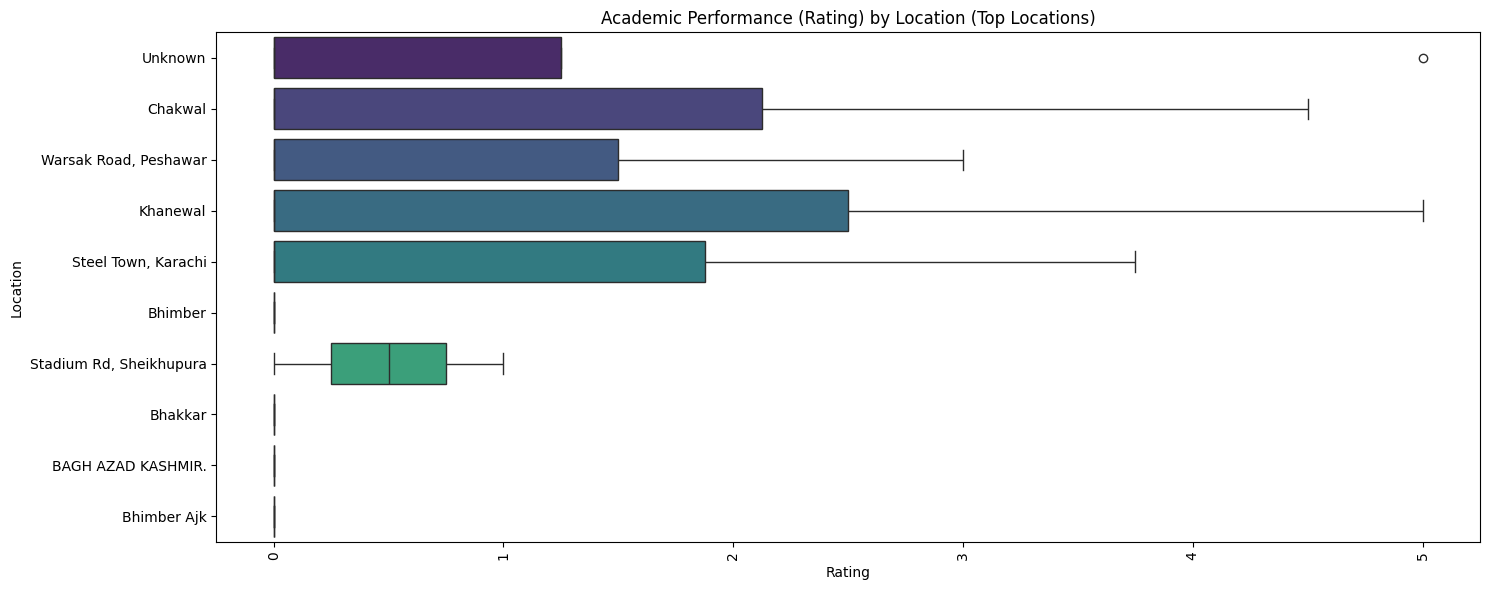

In [29]:
top_locations = data['Location'].value_counts().head(10).index
data_filtered = data[data['Location'].isin(top_locations)]
plt.figure(figsize=(15, 6))
sns.boxplot(x='Rating', y='Location', data=data_filtered, palette='viridis')
plt.title('Academic Performance (Rating) by Location (Top Locations)')
plt.xlabel('Rating')
plt.ylabel('Location')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<ipython-input-30-b5de534e65fa>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sector', y='Rating', data=data_filtered, palette='viridis')


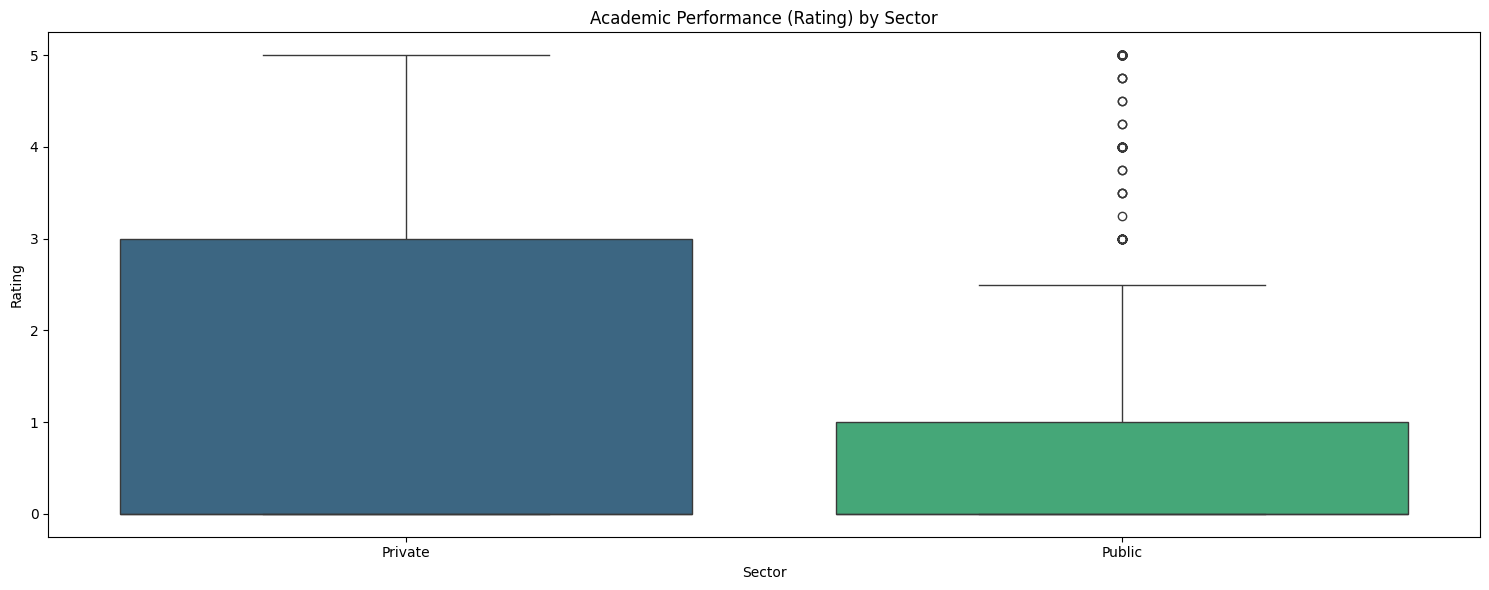

In [30]:
data_filtered = data[data['Sector'] != 'Unknown']
plt.figure(figsize=(15, 6))
sns.boxplot(x='Sector', y='Rating', data=data_filtered, palette='viridis')
plt.title('Academic Performance (Rating) by Sector')
plt.xlabel('Sector')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

In [31]:
performance_pivot = data.groupby('Location')['Rating'].mean()

In [32]:
min_ratings = 10
locations_with_enough_ratings = performance_pivot[performance_pivot.index.isin(performance_pivot.index[performance_pivot >= min_ratings])]

In [33]:
locations_with_enough_ratings = locations_with_enough_ratings.fillna(0)

In [34]:
average_ratings = data.groupby('Location')['Rating'].mean()

In [35]:
min_ratings = 5
locations_with_enough_ratings = data['Location'].value_counts() >= min_ratings
filtered_locations = locations_with_enough_ratings[locations_with_enough_ratings].index
average_ratings = average_ratings[average_ratings.index.isin(filtered_locations)]

In [36]:
top_locations = data['Location'].value_counts().head(10).index
data_filtered = data[data['Location'].isin(top_locations)]

<ipython-input-37-b1c37a0b92a5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rating', y='Study Program', data=data_filtered, palette='viridis')


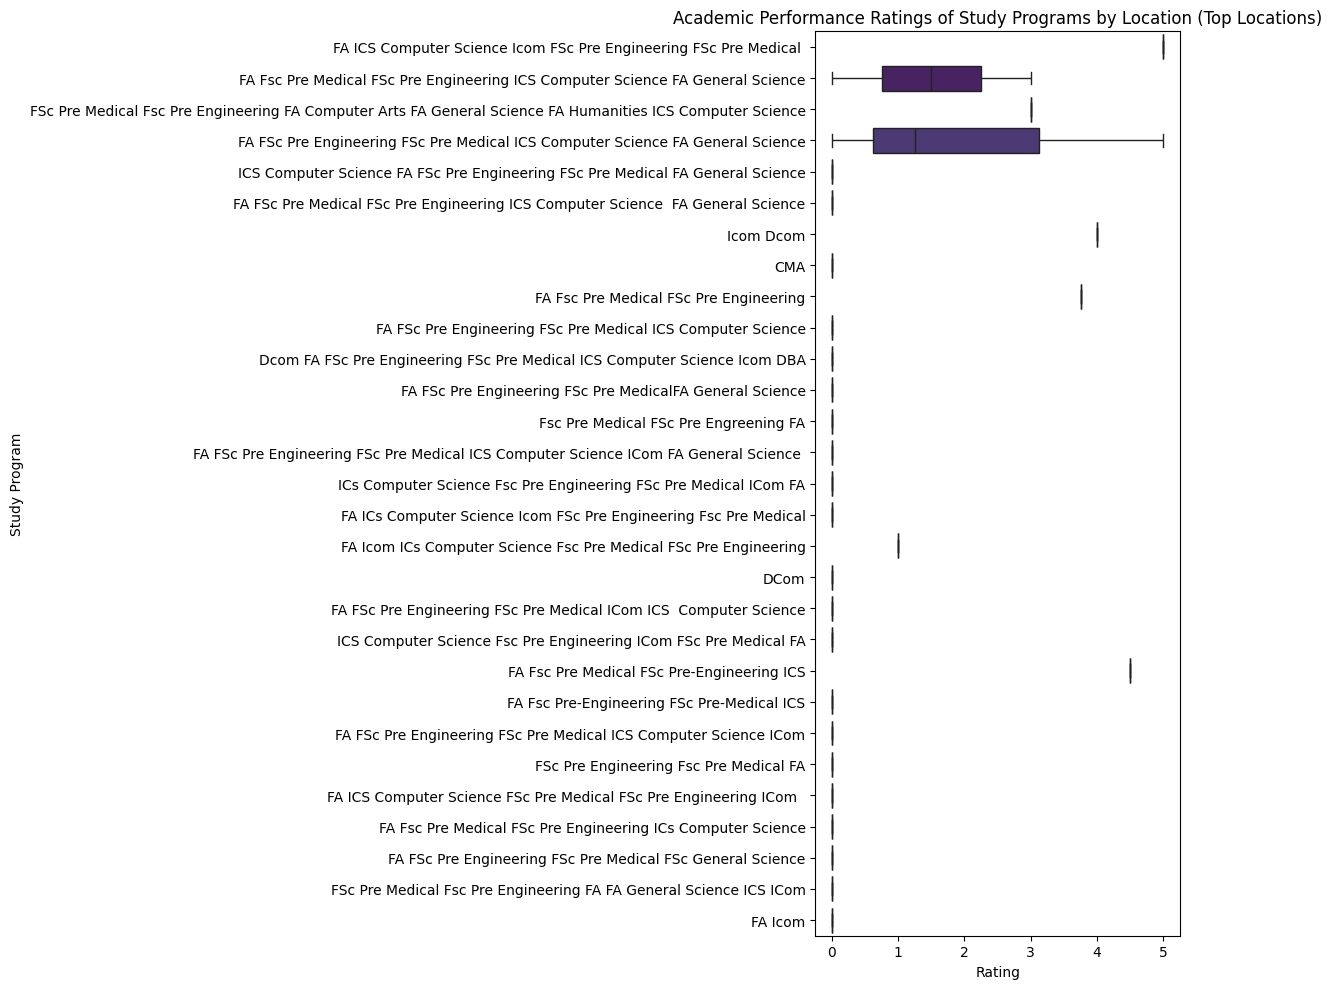

In [37]:
plt.figure(figsize=(12, 10))
sns.boxplot(x='Rating', y='Study Program', data=data_filtered, palette='viridis')
plt.title('Academic Performance Ratings of Study Programs by Location (Top Locations)')
plt.xlabel('Rating')
plt.ylabel('Study Program')
plt.tight_layout()
plt.show()

In [38]:
fig = px.scatter(data, x='Rating', y='Rating', color='Sector', hover_data=['Location', 'Name'])
fig.update_layout(title='Interactive Plot: Resources vs Performance')
fig.show()

In [39]:
sector_counts = data['Sector'].value_counts()

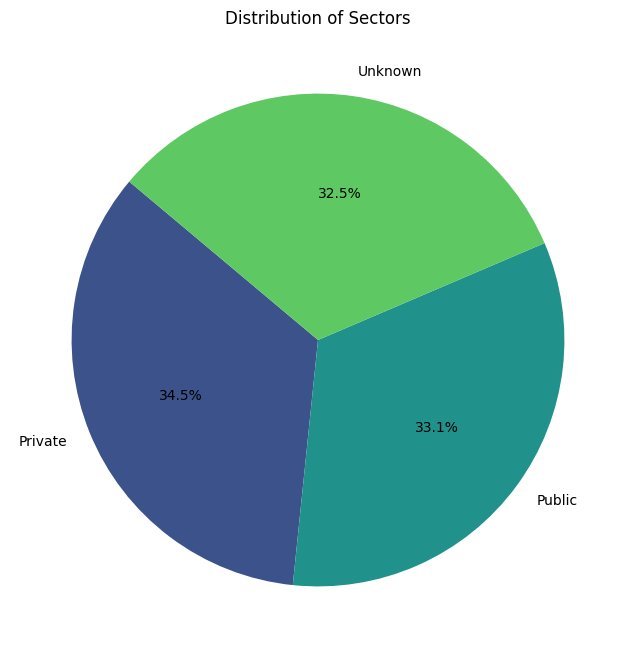

In [40]:
plt.figure(figsize=(8, 8))
plt.pie(sector_counts, labels=sector_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(sector_counts)))
plt.title('Distribution of Sectors')
plt.show()

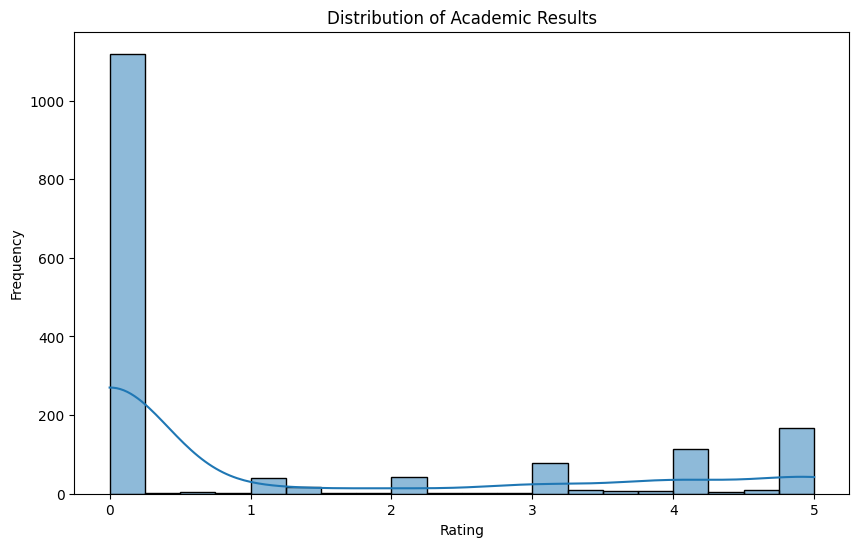

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Rating'], bins=20, kde=True)
plt.title('Distribution of Academic Results')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

<ipython-input-42-ace9e066ab8f>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




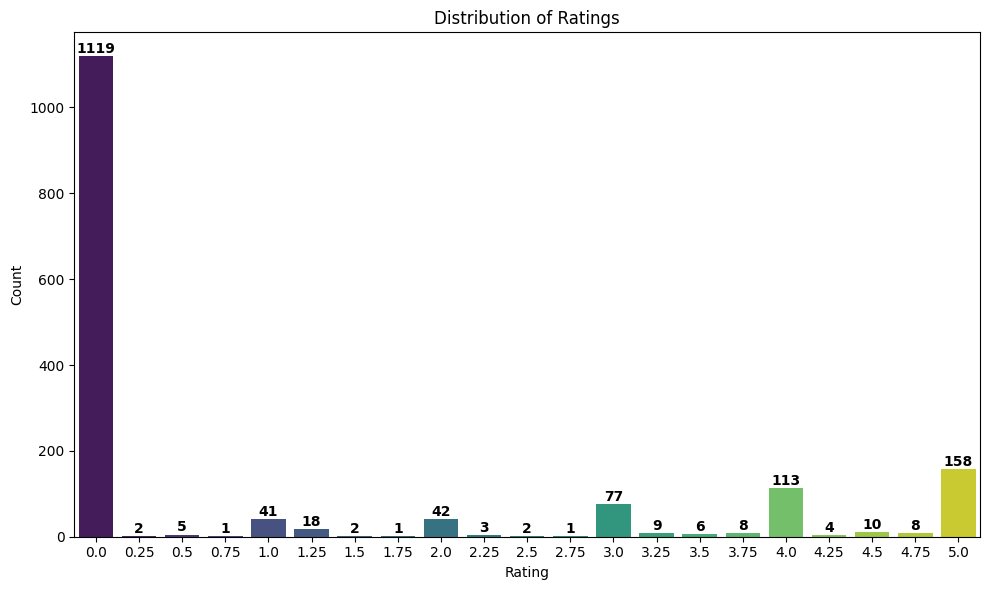

In [42]:
plt.figure(figsize=(10, 6))
rating_distribution = data['Rating'].value_counts().sort_index()
sns.barplot(x=rating_distribution.index, y=rating_distribution.values, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
for index, value in enumerate(rating_distribution.values):
    plt.text(index, value + 0.2, str(value), ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()